[](http://)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**We must check these Key k-means assumptions before we implement our Kmeans Clustering Mode**
- Symmetric distribution of variables (not skewed)
- Variables with same average values
- Variables with same variance

In [2]:
rfm=pd.read_csv('../../data/processed/rfmclea.csv')

In [3]:
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle
1,12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top
2,12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle
3,12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top
4,12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low


In [4]:
rfm_log=np.loadtxt('../../data/processed/rfm_normalized.csv',delimiter=',')

In [5]:
rfm_log

array([[ 1.40998159, -2.77997064,  3.70023933],
       [-2.14657818,  1.16036535,  1.41349442],
       [ 0.38364809, -0.17983348,  0.71994094],
       ...,
       [-1.1788923 , -0.89839206, -1.11262551],
       [-1.66273524,  2.20299461,  0.82219054],
       [-0.00454336,  0.43650655,  0.73737886]])

**From this table, we find this Problem: Mean and Variance are not Equal**

**Soluation: Scaling variables by using a scaler from scikit-learn library**

In [6]:
rfm1 = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm1.describe())

           Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     92.536422    90.523744    2048.688081
std     100.014169   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.000000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


In [7]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

**2. Choosing a Number of Clusters**

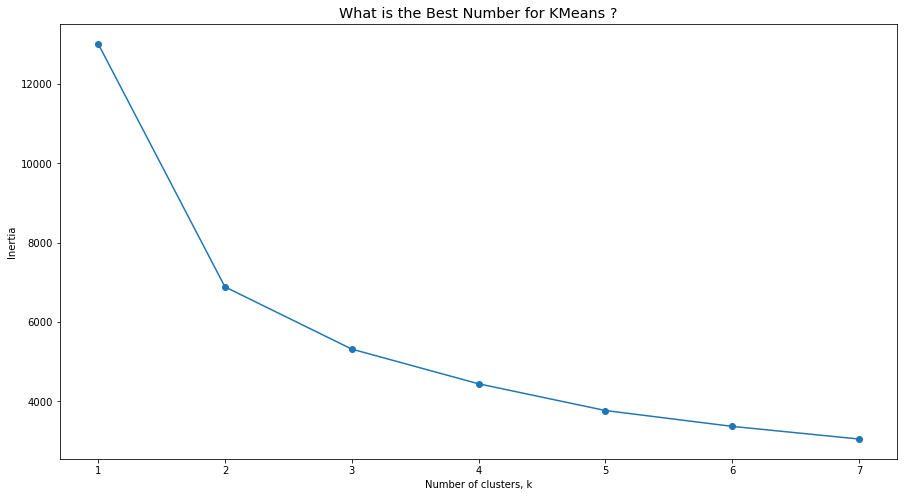

In [8]:
#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()


In [9]:
# clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_log)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_k3 = rfm1.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)


Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           171.0      15.0         293.0  1523
1            69.0      65.0        1167.0  1859
2            13.0     260.0        6559.0   956

In [14]:
rfm_k3.head()

,Recency,Frequency,MonetaryValue,K_Cluster
0,326,1,77183.60,1
1,2,182,4310.00,2
2,75,31,1797.24,1
3,19,73,1757.55,1
4,310,17,334.40,0


In [19]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm.index,columns=rfm.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = rfm['General_Segment']
rfm_normalized.reset_index(inplace = True)

In [22]:
rfm_normalized

,level_0,index,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,K_Cluster
0,0,0,12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle,1
1,1,1,12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top,2
2,2,2,12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle,1
3,3,3,12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top,1
4,4,4,12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,4333,4333,18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Low,0
4334,4334,4334,18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Low,0
4335,4335,4335,18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Middle,0
4336,4336,4336,18283.0,4,721,2045.53,4,4,4,4.04.04.0,12,Top,2


In [23]:
#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','General_Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,General_Segment,K_Cluster,Metric,Value
0,12346.0,Middle,1,Recency,326.0
1,12347.0,Top,2,Recency,2.0
2,12348.0,Middle,1,Recency,75.0
3,12349.0,Top,1,Recency,19.0
4,12350.0,Low,0,Recency,310.0


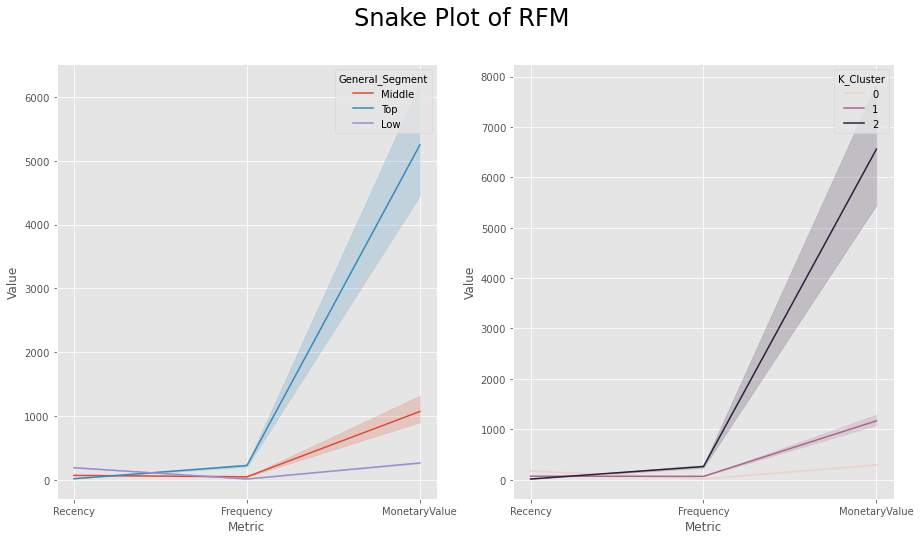

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', data = rfm_melt,ax=ax1)

# a snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)

plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

In [27]:
cluster_avg = rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm1.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,0.85,-0.84,-0.86
1,-0.25,-0.28,-0.43
2,-0.86,1.87,2.20


In [29]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,index,CustomerID,Recency
General_Segment,,,
Low,0.03,0.01,1.08
Middle,0.01,0.00,-0.22
Top,-0.04,-0.01,-0.78


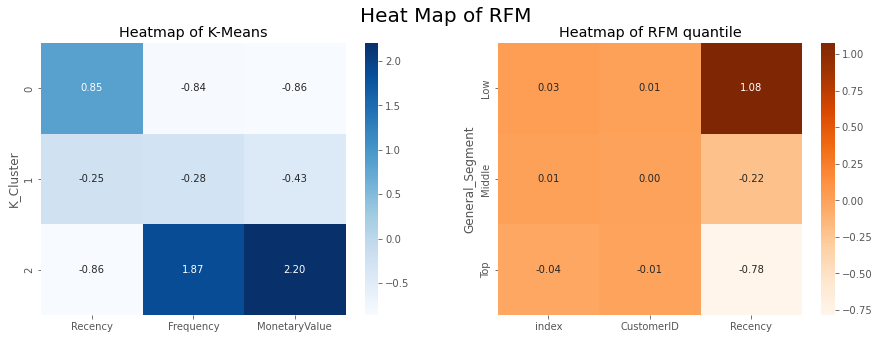

In [30]:
# heatmap with RFM
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

# a snake plot with K-Means
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True,ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")

plt.suptitle("Heat Map of RFM",fontsize=20) #make title fontsize subtitle 

plt.show()
